In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [41]:
# Make sure the path corresponds to where main.py script saves the file
data_path = '../data/search_results.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the data to verify it loaded correctly
data.head(10), data.shape, data.columns

(                                 Indicator              Group          State  \
 0                      Depressive Disorder  National Estimate  United States   
 1                         Anxiety Disorder           By State        Vermont   
 2                         Anxiety Disorder           By State       Virginia   
 3                         Anxiety Disorder           By State     Washington   
 4                         Anxiety Disorder           By State  West Virginia   
 5                         Anxiety Disorder           By State      Wisconsin   
 6                         Anxiety Disorder           By State        Wyoming   
 7  Anxiety Disorder or Depressive Disorder  National Estimate  United States   
 8  Anxiety Disorder or Depressive Disorder             By Age  United States   
 9  Anxiety Disorder or Depressive Disorder             By Age  United States   
 
         Subgroup Time Period Start Date Time Period End Date  Value  
 0  United States             2020-0

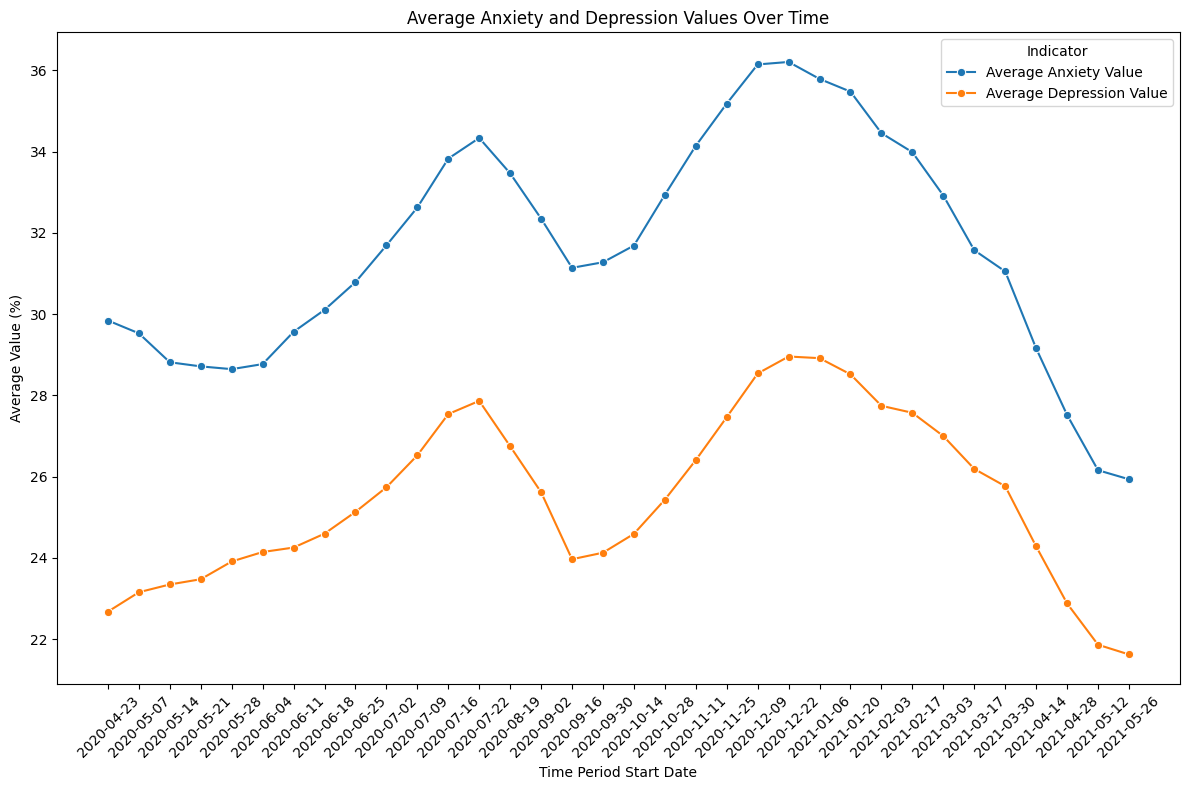

In [42]:
# Filter for 'Anxiety Disorder' and 'Depressive Disorder'
anxiety_data = data[data['Indicator'] == 'Anxiety Disorder']
depression_data = data[data['Indicator'] == 'Depressive Disorder']

# Group by 'Time Period Start Date' and calculate the average 'Value'
anxiety_avg = anxiety_data.groupby('Time Period Start Date')['Value'].mean()
depression_avg = depression_data.groupby('Time Period Start Date')['Value'].mean()

# Apply a moving average with a window size of 4 for both indicators
anxiety_avg_smooth = anxiety_avg.rolling(window=4, min_periods=1).mean()
depression_avg_smooth = depression_avg.rolling(window=4, min_periods=1).mean()

# Creating a DataFrame suitable for Seaborn plotting by combining the two series
combined_data = pd.DataFrame({
    'Time Period': anxiety_avg_smooth.index,
    'Average Anxiety Value': anxiety_avg_smooth.values,
    'Average Depression Value': depression_avg_smooth.values
})

# Melting the DataFrame for easier plotting with Seaborn
melted_data = pd.melt(combined_data, id_vars=['Time Period'], var_name='Indicator', value_name='Average Value')

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_data, x='Time Period', y='Average Value', hue='Indicator', marker='o')
plt.title('Average Anxiety and Depression Values Over Time')
plt.xlabel('Time Period Start Date')
plt.ylabel('Average Value (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


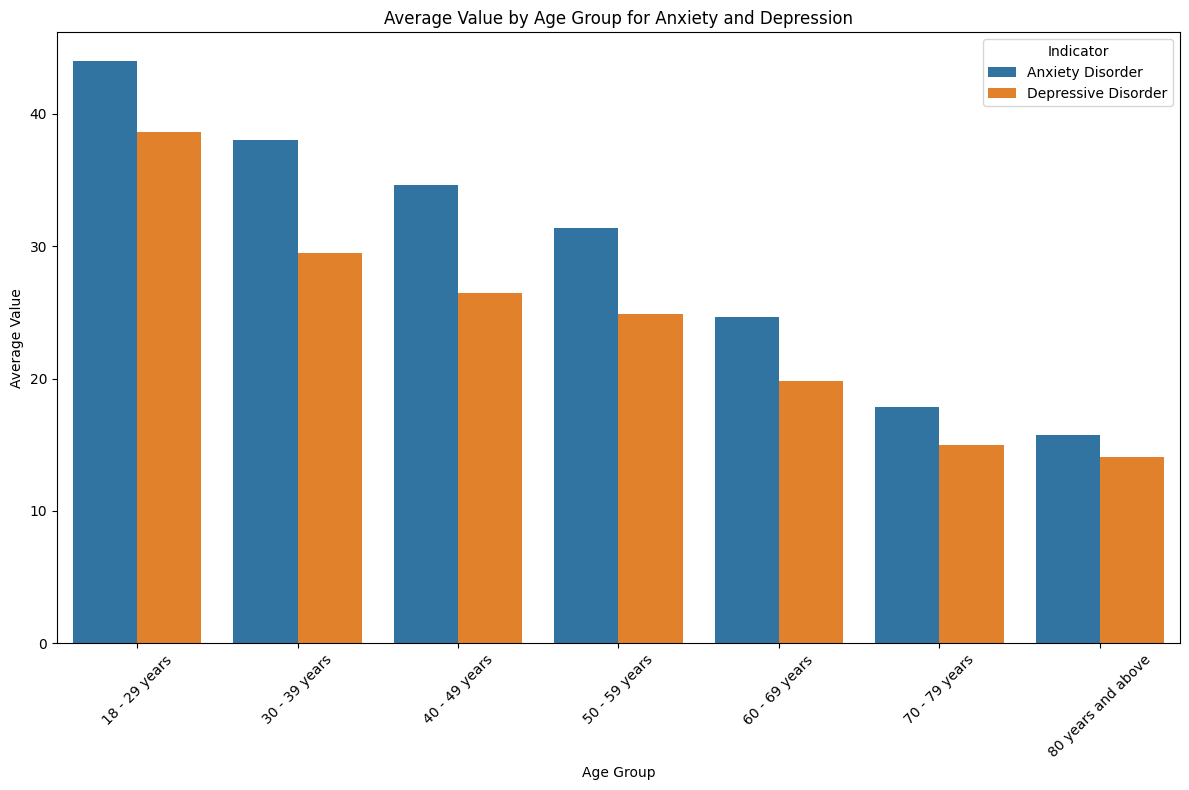

In [43]:
# Filter the data for Anxiety and Depressive Disorder and extract relevant columns
filtered_data = data[data['Indicator'].isin(['Anxiety Disorder', 'Depressive Disorder'])]

# Group the data by Subgroup (age) and Indicator, then calculate the average 'Value'
grouped_data = filtered_data.groupby(['Subgroup', 'Indicator'])['Value'].mean().unstack()

# Reset the index to prepare for plotting
grouped_data.reset_index(inplace=True)

# Filter out non-age specific rows (entries not containing "years")
age_specific_data = grouped_data[grouped_data['Subgroup'].str.contains('years')]

# Plot the average value by age group for Anxiety and Depression
plt.figure(figsize=(12, 8))
sns.barplot(data=age_specific_data.melt(id_vars=['Subgroup'], var_name='Indicator', value_name='Average Value'), 
            x='Subgroup', y='Average Value', hue='Indicator')
plt.title('Average Value by Age Group for Anxiety and Depression')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

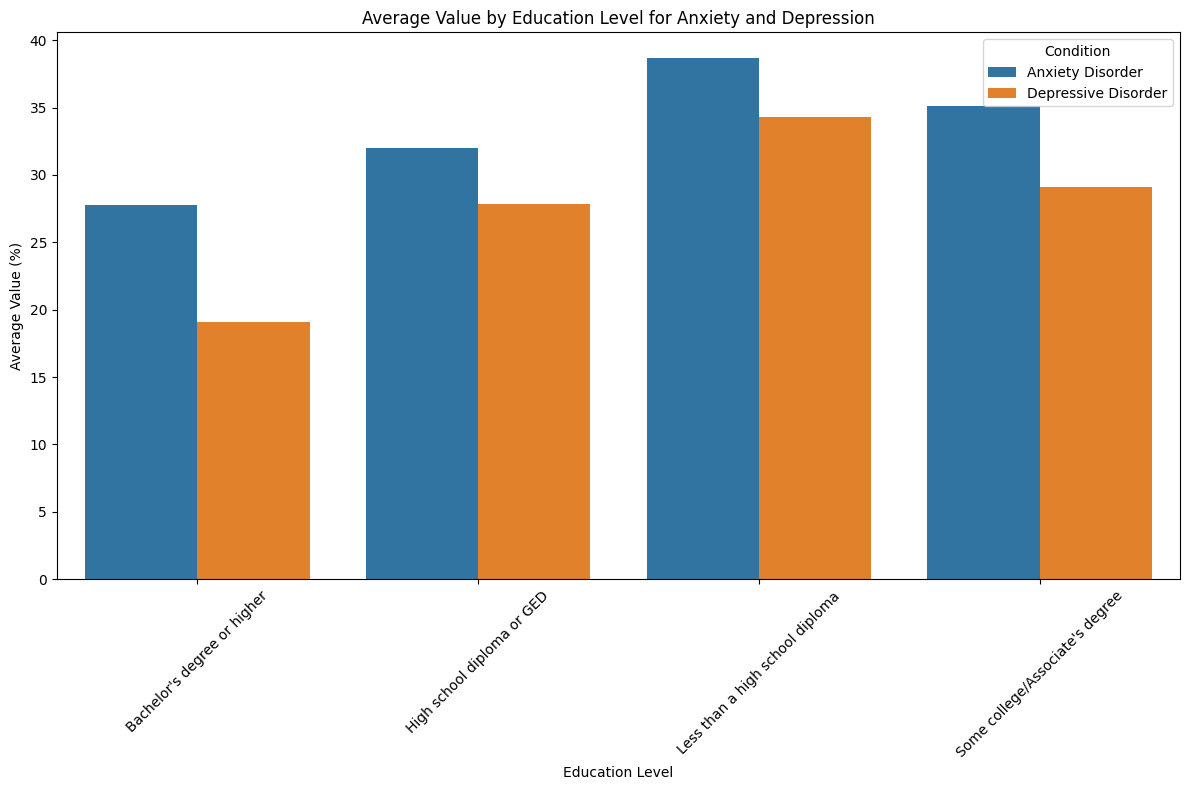

In [44]:
# Filter the data for Anxiety and Depressive Disorder and extract relevant columns
filtered_data = data[data['Indicator'].isin(['Anxiety Disorder', 'Depressive Disorder'])]

# Filter data where 'Group' contains information about education
education_data = filtered_data[filtered_data['Group'] == 'By Education']

# Calculate the average 'Value' grouped by 'Subgroup' (education levels) and 'Indicator' (condition)
grouped_education_data = education_data.groupby(['Subgroup', 'Indicator'])['Value'].mean().reset_index()

# Create the bar chart using seaborn

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=grouped_education_data, x='Subgroup', y='Value', hue='Indicator')
plt.title('Average Value by Education Level for Anxiety and Depression')
plt.xlabel('Education Level')
plt.ylabel('Average Value (%)')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

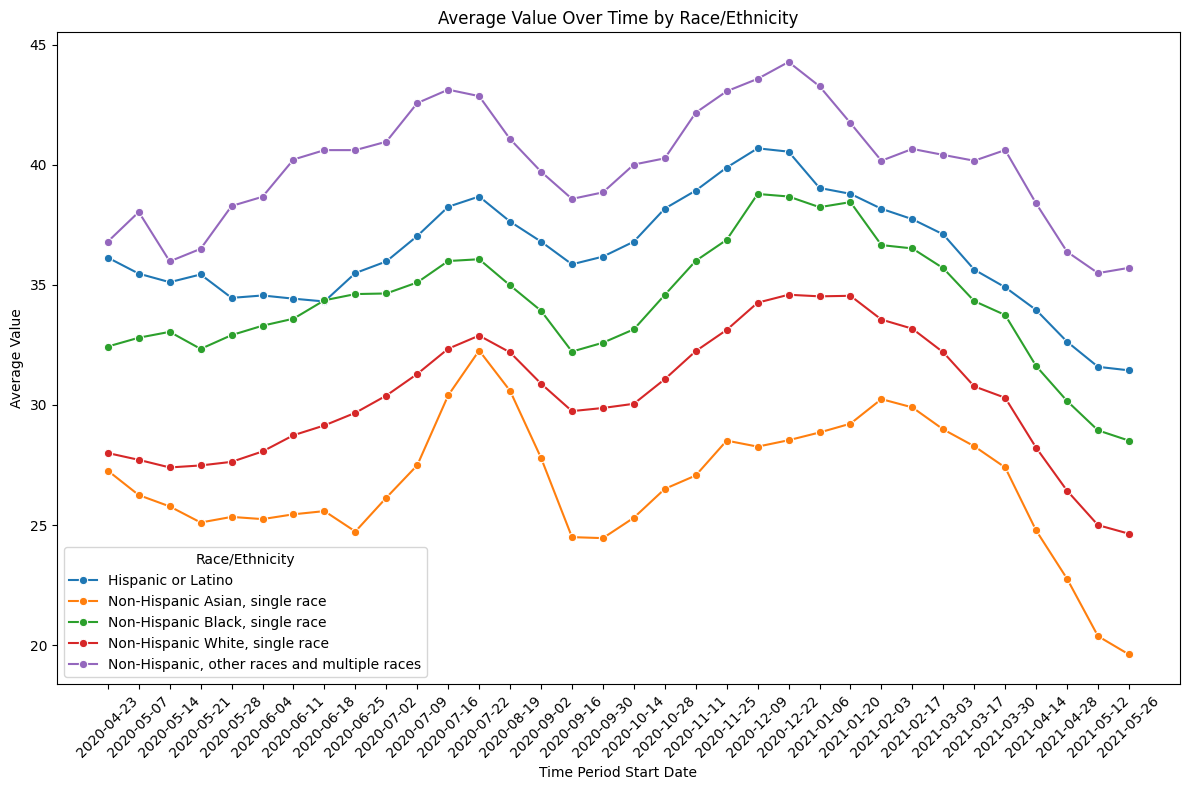

In [45]:
# Filter data for race/ethnicity analysis
race_data = data[data['Group'] == 'By Race/Hispanic ethnicity']

# Group by date and subgroup to calculate the average
race_data_avg = race_data.groupby(['Time Period Start Date', 'Subgroup']).agg({'Value':'mean'}).reset_index()

# Apply a moving average with a window size of 4
race_data_avg['Smoothed Value'] = race_data_avg.groupby('Subgroup')['Value'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=race_data_avg, x='Time Period Start Date', y='Smoothed Value', hue='Subgroup', marker='o')
plt.title('Average Value Over Time by Race/Ethnicity')
plt.xlabel('Time Period Start Date')
plt.ylabel('Average Value')
plt.legend(title='Race/Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# Dictionary to convert state names to two-letter abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Filter data to include only rows where Subgroup is a valid state name
data = data[data['Subgroup'].isin(state_abbrev.keys())]

# Convert full state names to abbreviations
data['State'] = data['Subgroup'].map(state_abbrev)

# Filter for "By State" in 'Group' and exclude 'United States' in 'State'
filtered_data = data[(data['Group'] == 'By State') & (data['State'] != 'United States')]

# Calculate the average 'Value' for each state and add rankings
state_averages = filtered_data.groupby('State')['Value'].mean().reset_index()
state_averages['Rank'] = state_averages['Value'].rank(method='min', ascending=True)

# Create a choropleth map
fig = px.choropleth(
    state_averages,
    locations='State',  # Name of the column containing the states
    locationmode='USA-states',  # Set to use USA states shape
    color='Value',  # Data column that determines the color of states
    scope="usa",  # Focus map scope to USA
    color_continuous_scale="Viridis",  # Color scale
    hover_data={'State': True, 'Value': True, 'Rank': True},  # Additional data to show on hover
    labels={'Value': 'Average Value', 'Rank': 'Rank'},  # Labels for the hover tooltip
    title='Average Value by State'  # Title of the map
)

# Update layout to better fit the state labels and avoid clipping
fig.update_layout(geo=dict(lakecolor='white'))  # Set lake color to white for better visibility

# Show the figure
fig.show()